## CS5102 - DIP Project | Quality Inspection of the Workpiece

Group: 29 <br>
Authors: <br>
 Deep Patel, ME21D0004 <br>
 Radhika Mittal, CED19I050 <br>
 Yash Kumar Sahu, CED19I039 

In [1]:
import os
import cv2
from matplotlib import pyplot as plt   

# Problem Domain

<img src=".\Project\problem.png" >



# Image acquisition

<img src=".\Project\workspace.png" >

**Workspace setup**

Camera Model: IS7802

40 sample images (Varied illumination, Posistion and orientation)

Workpiece size: ~25mm DIA and 30mm DIA (approx) 
Workpiece type: Aluminum 7075 and 6061

**Assumptions**

Similar
-  Reflective Property
-  Illumination
-  Height







# Colour image processing | Reading Input Color Image as Grayscale

No. of Images =  40


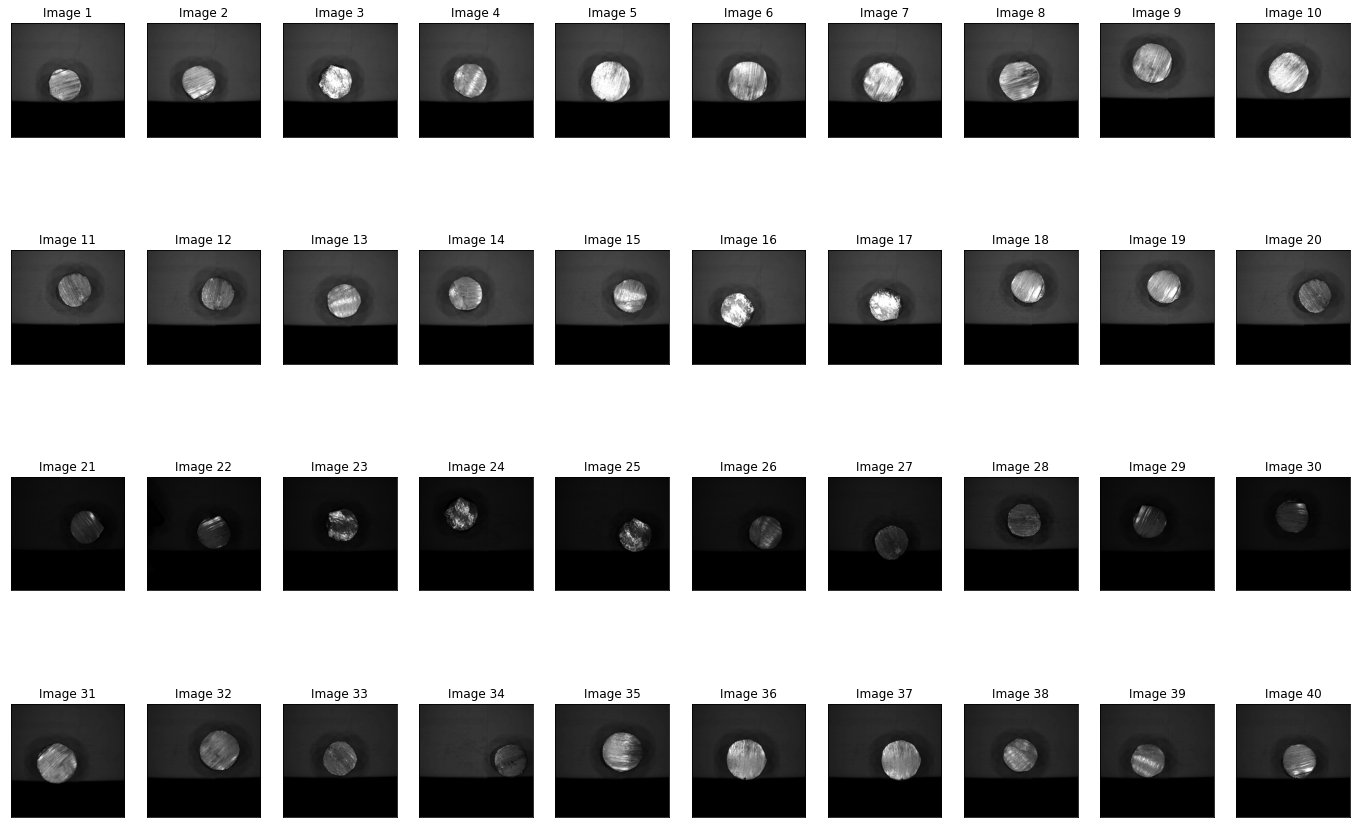

In [7]:
from matplotlib import pyplot as plt  
import cv2
import glob
import os
from PIL import Image, ImageOps 
import numpy as np

images = [Image.open(file) for file in glob.glob(os.getcwd()+"/Project/dataset/*.BMP")]
print("No. of Images = ", len(images))

gray_images=[]
rgb_images=[]
new_width=900
new_height=900

plt.rcParams["figure.figsize"]=24,16
for i in range(len(images)):
    im=images[i]
    width, height = im.size  # Get dimensions

    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2

    # Crop the center of the image
    im = im.crop((left, top, right, bottom))
    im2=np.array(im)
    rgb_images.append(im2)
    im=ImageOps.grayscale(im)
    im=np.array(im)
    gray_images.append(im)
    
    
for i in range(len(gray_images)):    
    plt.subplot(4,10,i+1),plt.imshow(gray_images[i],'gray')
    plt.title("Image "+str(i+1))
    plt.xticks([]),plt.yticks([])
plt.show()

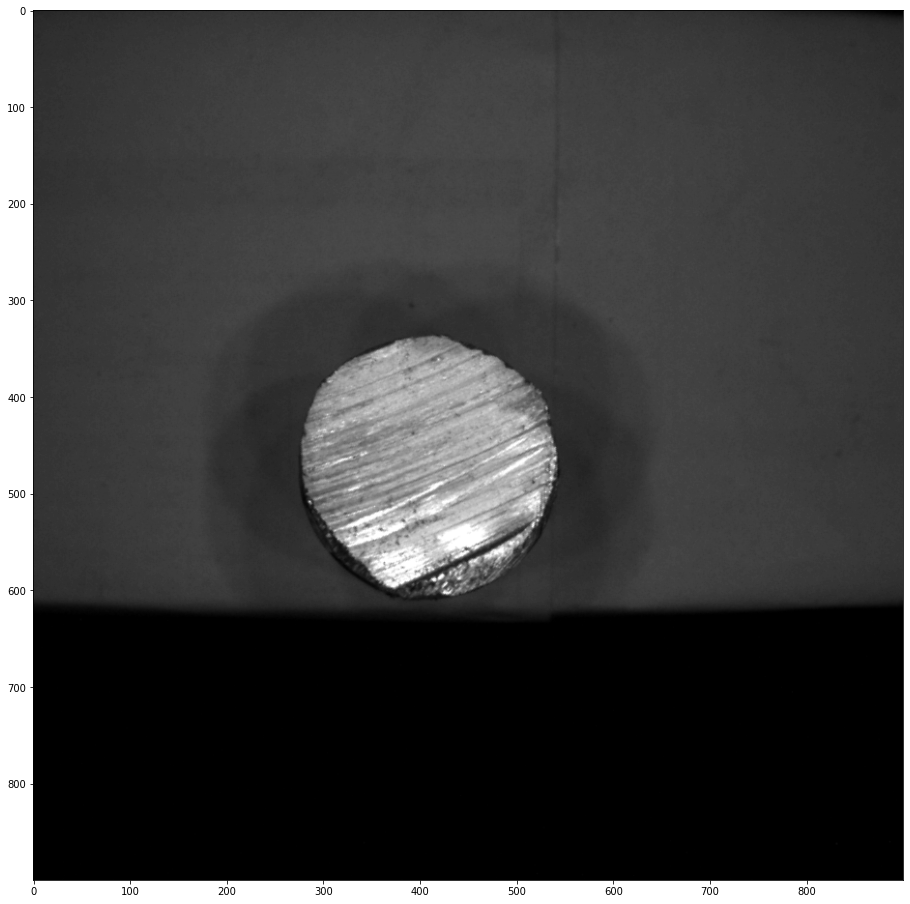

In [10]:
plt.imshow(gray_images[1], cmap='gray', vmin = 0, vmax = 255)

# Image filtering and enhancement

## Gaussian Filter

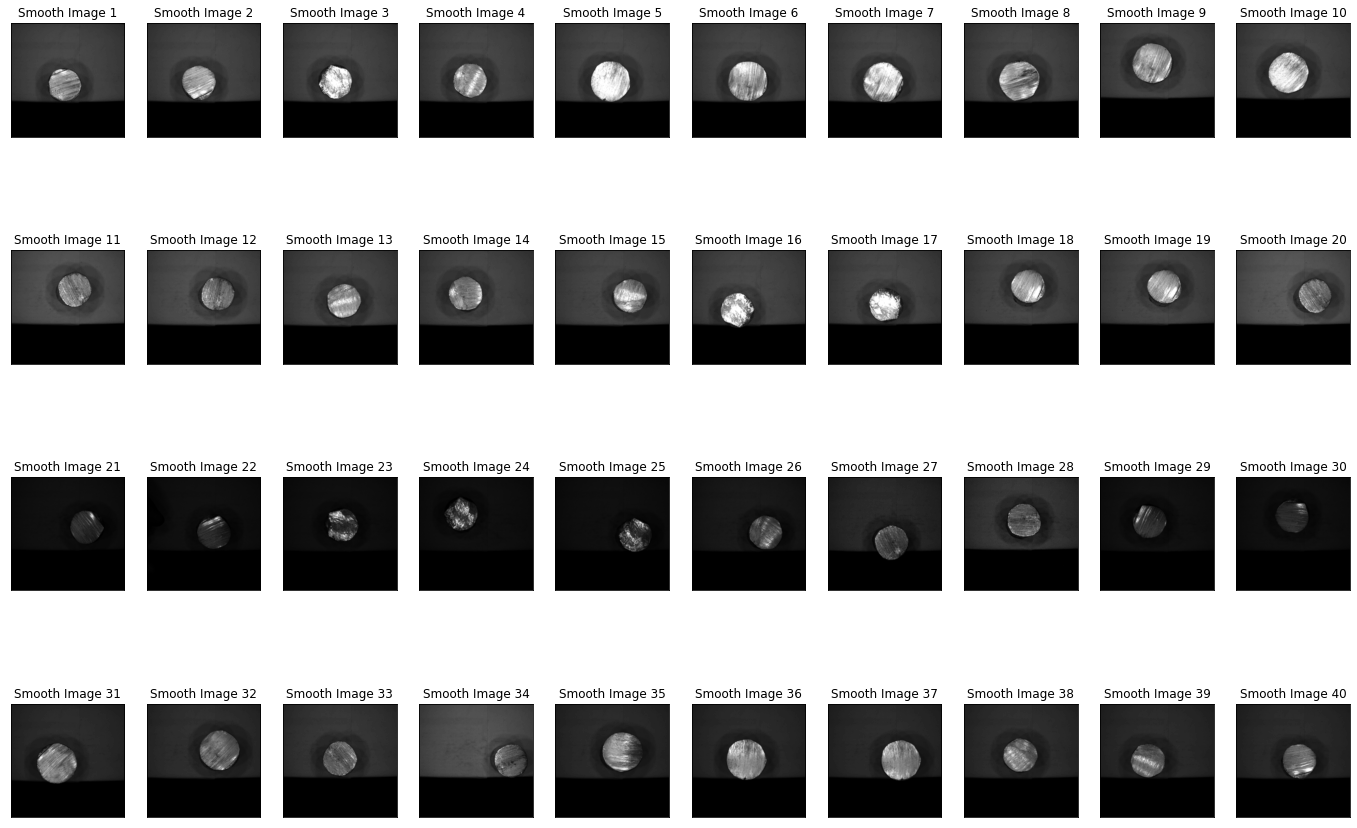

In [9]:
kernel = np.ones((5,5),np.float32)/25
smooth_images=[]
for i in range(len(gray_images)):
    smooth_images.append(cv2.filter2D(gray_images[i],-1,kernel))
    
    plt.subplot(4,10,i+1),plt.imshow(smooth_images[i],'gray')
    plt.title("Smooth Image "+str(i+1))
    plt.xticks([]),plt.yticks([])

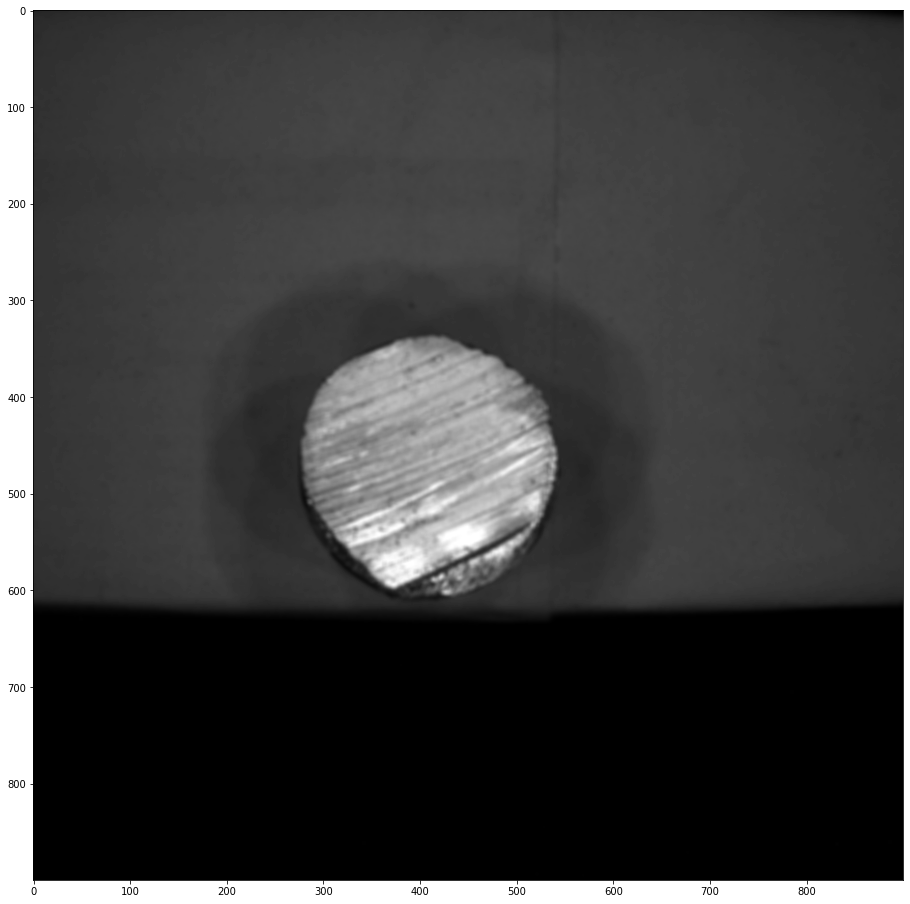

In [11]:
plt.imshow(smooth_images[1], cmap='gray', vmin = 0, vmax = 255)

## Histogram Equalisation


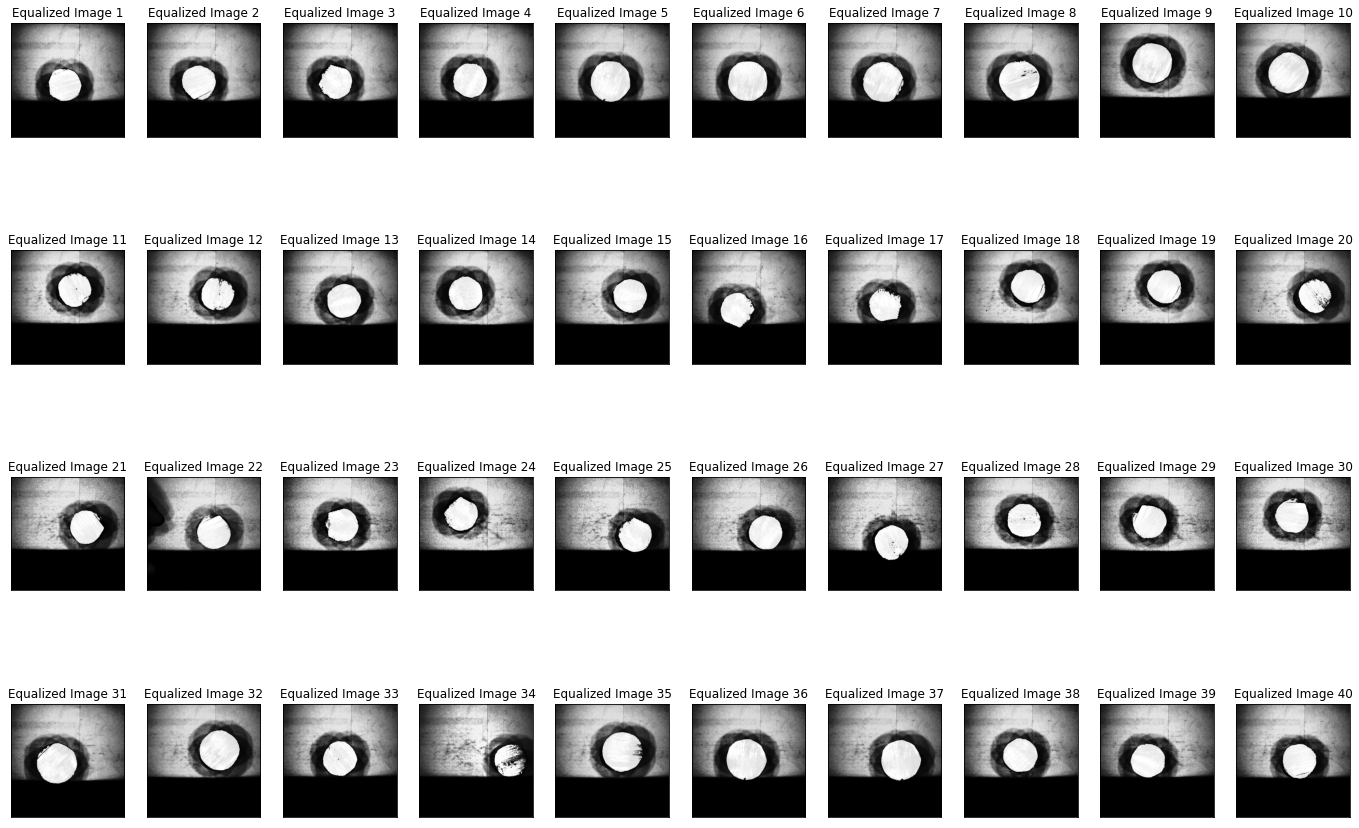

In [15]:
equal_images=[]
for i in range(len(smooth_images)):
    equal_images.append(cv2.equalizeHist(smooth_images[i]))
    
    plt.subplot(4,10,i+1),plt.imshow(equal_images[i],'gray')
    plt.title("Equalized Image "+str(i+1))
    plt.xticks([]),plt.yticks([])

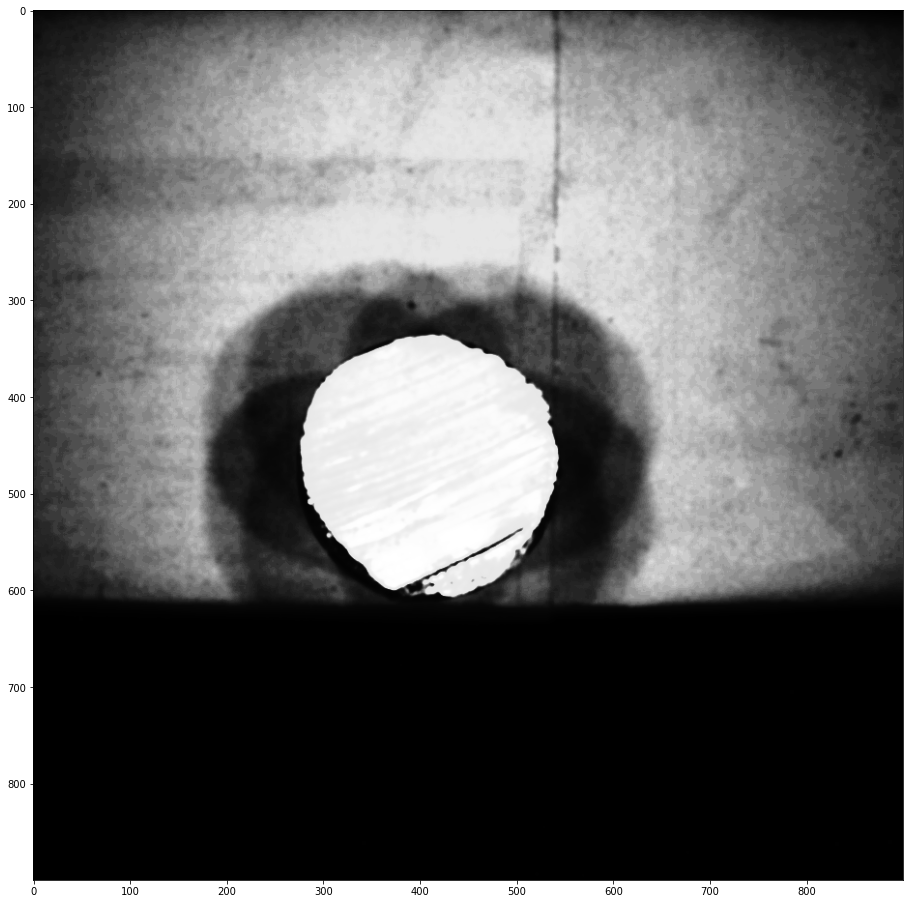

In [16]:
plt.imshow(equal_images[1], cmap='gray', vmin = 0, vmax = 255)

## References

Gonzalez, Rafael C. and Woods, Richard E.. Digital image processing. Upper Saddle River, N.J.: Prentice Hall, 2008

W. Sriratana, N. Narknam, R. Apichitanon and N. Tammarugwattana, "Application of Webcam for Inspection of Rice Grain Quality by Using Image Processing Technique," 2020 20th International Conference on Control, Automation and Systems (ICCAS), 2020, pp. 1134-1139, doi: 10.23919/ICCAS50221.2020.9268316.

https://learnopencv.com/contour-detection-using-opencv-python-c/

https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html  

https://docs.opencv.org/3.4/d4/d73/tutorial_py_contours_begin.html  

https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html  
